In [37]:
import cf_xarray
import xarray as xr

url = "http://www.smast.umassd.edu:8080/thredds/dodsC/models/fvcom/NECOFS/Forecasts/NECOFS_GOM7_FORECAST.nc"
ds = xr.open_dataset(url, engine='netcdf4', drop_variables=['Itime', 'Itime2'])
ds = ds.set_coords(['lon', 'lat', 'lonc', 'latc', 'xc', 'yc'])
ds

<xarray.Dataset>
Dimensions:      (node: 198594, nele: 356280, siglay: 45, siglev: 46, three: 3,
                  time: 193)
Coordinates:
    x            (node) float32 ...
    y            (node) float32 ...
    lon          (node) float32 ...
    lat          (node) float32 ...
    xc           (nele) float32 ...
    yc           (nele) float32 ...
    lonc         (nele) float32 ...
    latc         (nele) float32 ...
    siglay       (siglay, node) float32 ...
    siglev       (siglev, node) float32 ...
  * time         (time) datetime64[ns] 2024-04-12 ... 2024-04-20
Dimensions without coordinates: node, nele, three
Data variables: (12/13)
    h            (node) float32 ...
    nv           (three, nele) int32 ...
    Times        (time) |S64 ...
    zeta         (time, node) float32 ...
    u            (time, siglay, nele) float32 ...
    v            (time, siglay, nele) float32 ...
    ...           ...
    ua           (time, nele) float32 ...
    va           (time, nele) float32 ...
    temp         (time, siglay, node) float32 ...
    salinity     (time, siglay, node) float32 ...
    uwind_speed  (time, nele) float32 ...
    vwind_speed  (time, nele) float32 ...
Attributes: (12/18)
    title:                           FVCOM GOM NECOFS HINDCAST UPDATE
    institution:                     School for Marine Science and Technology
    source:                          FVCOM_4.4.5
    history:                         Mon Apr 15 11:38:09 2024: ncrcat -O -v x...
    references:                      http://fvcom.smast.umassd.edu, http://co...
    Conventions:                     CF-1.0
    ...                              ...
    Surface_Wind_Forcing:            FVCOM variable surface Wind forcing:\nFI...
    Surface_PrecipEvap_Forcing:      FVCOM periodic surface precip forcing:\n...
    NCO:                             netCDF Operators version 5.1.7 (Homepage...
    DODS.strlen:                     26
    DODS.dimName:                    DateStrLen
    DODS_EXTRA.Unlimited_Dimension:  time

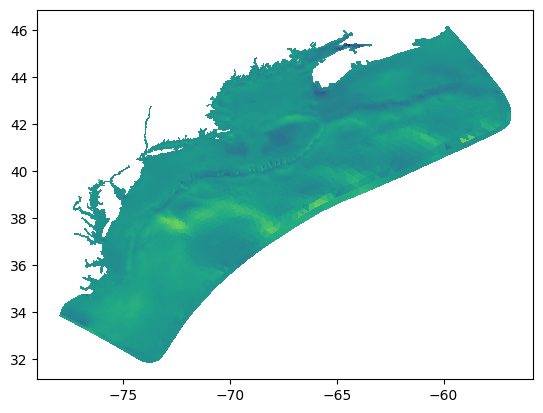

In [41]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt

u = ds.u.isel(time=0, siglay=0)
tris = ds.nv.T.values - 1
lon = ds.lon.values
lat = ds.lat.values
#tris = tri.Triangulation(lon, lat, ds.nv.T -1)

plt.tripcolor(lon, lat, tris, u, shading='flat')

In [4]:
ds_c = xr.open_dataset('http://www.smast.umassd.edu:8080/thredds/dodsC/models/fvcom/NECOFS/Forecasts/NECOFS_GOM3_FORECAST_coordinate.nc', engine='netcdf4')
ds_c

<xarray.Dataset>
Dimensions:  (node: 48728, nele: 90998, siglay: 40, siglev: 41, three: 3,
              time: 1)
Coordinates:
    x        (node) float32 ...
    y        (node) float32 ...
    siglay   (siglay, node) float32 ...
    siglev   (siglev, node) float32 ...
  * time     (time) datetime64[ns] 2010-11-01T01:01:52.499999744
Dimensions without coordinates: node, nele, three
Data variables: (12/13)
    lon      (node) float32 ...
    lat      (node) float32 ...
    xc       (nele) float32 ...
    yc       (nele) float32 ...
    lonc     (nele) float32 ...
    latc     (nele) float32 ...
    ...       ...
    nv       (three, nele) int32 ...
    Times    (time) |S64 ...
    nbe      (three, nele) int32 ...
    aw0      (three, nele) float32 ...
    awx      (three, nele) float32 ...
    awy      (three, nele) float32 ...
Attributes: (12/20)
    title:                           FVCOM GOM3v11_nest NECOFS FORECAST UPDATE
    institution:                     School for Marine Science and Technology
    source:                          FVCOM_3.0
    history:                         Wed Apr 13 13:19:17 2011: ncrcat -O -v x...
    references:                      http://fvcom.smast.umassd.edu, http://co...
    Conventions:                     CF-1.0
    ...                              ...
    Icing_Model_Forcing:             FVCOM variable surface icing forcing:\nF...
    Special_Physical_processes:      long shore flow adjustment for thermal w...
    nco_openmp_thread_number:        1
    DODS.strlen:                     26
    DODS.dimName:                    DateStrLen
    DODS_EXTRA.Unlimited_Dimension:  time